In [1]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(25)

In [2]:
neu_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("a.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        neu_faces[filename] = cv2.imread(filename, 0)

[ WARN:0@0.611] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._134a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.614] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._7a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.615] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._83a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.617] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._163a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.619] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._175a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.621] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._122a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.622] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._95a.jpg'): can't open/read file: c

In [3]:
smi_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("b.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        smi_faces[filename] = cv2.imread(filename, 0)
        

[ WARN:0@3.751] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._60b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3.753] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._138b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3.754] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._21b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3.756] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._179b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3.758] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._196b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3.759] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._76b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3.761] global loadsave.cpp:244 findDecoder imread_('__MACOSX/upload_dataset/._99b.jpg'): can't open/read file: c

In [4]:
neu_faces = {k: v for k, v in neu_faces.items() if v is not None}
smi_faces = {k: v for k, v in smi_faces.items() if v is not None}

In [5]:
list(neu_faces.keys())[:5]

['upload_dataset/134a.jpg',
 'upload_dataset/7a.jpg',
 'upload_dataset/83a.jpg',
 'upload_dataset/163a.jpg',
 'upload_dataset/175a.jpg']

### Show first 16 faces

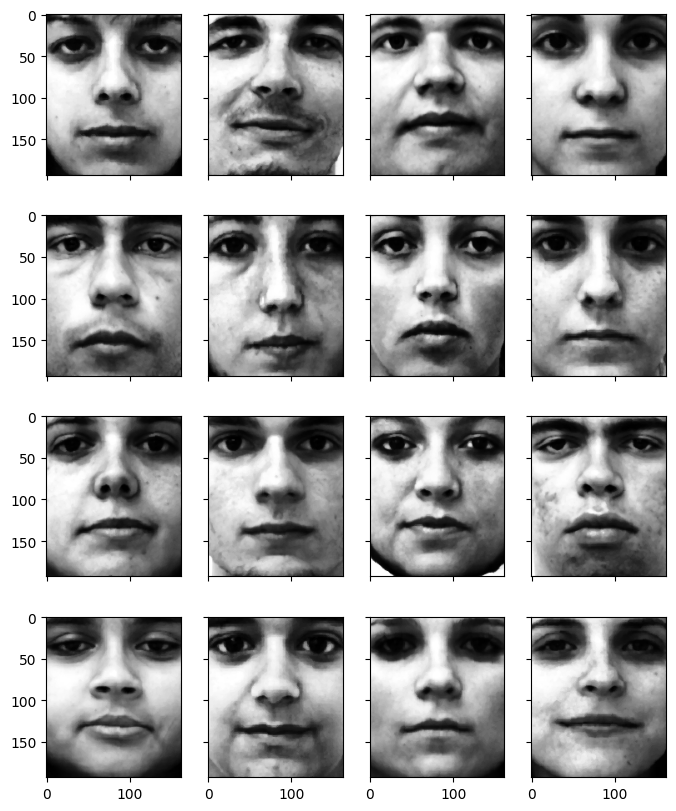

In [6]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
neu_faceimages = list(neu_faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(neu_faceimages[i], cmap="gray")
plt.show()

In [7]:
# get face shape
faceshape = list(neu_faces.values())[0].shape
print(faceshape)

(193, 162)


# Question 1

In [8]:
#select 100 random keys of NEUTRAL FACES
rand_neukeys = random.sample(list(neu_faces),100)
rand_neu = {k: v for k, v in neu_faces.items() if k in rand_neukeys}

(31266, 100)


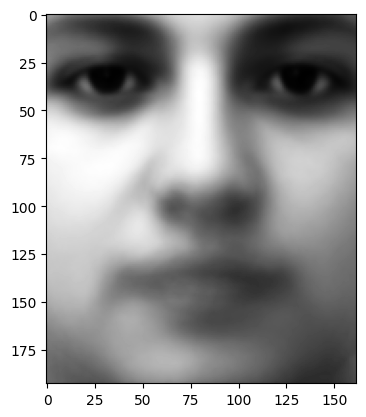

In [9]:
avg_list = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
avg_list = np.vstack(avg_list)
print(avg_list.shape)
faceArr = []
for i in range(31266):
    faceArr.append(np.mean(avg_list[i]))

avg_face = np.array(faceArr)
avFace = avg_face.reshape(193,162)
plt.imshow(avFace, cmap="gray")
plt.show()

#get the average of the 100 faces
avg_face = np.sum(avg_list, axis=0)/100
show_avg_face = avg_face.reshape(193,162)
plt.imshow(show_avg_face, cmap="gray")
plt.show()
#for each face subtract avg_face

#flatten the neutral faces and subtract by the avg
flat_neu = [np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]
flat_neu = [np.subtract(i, avg_face) for i in flat_neu]
norm_flat_neu = np.linalg.norm(flat_neu)
flat_neu = [i/norm_flat_neu for i in flat_neu]

In [10]:
#flatten the neutral faces (store as columns) and subtract by the avg
flat_neu = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
flat_neu = np.vstack(flat_neu)
print(flat_neu)
print(flat_neu.shape)


#flat_neu = [np.subtract(i, avg_face) for i in flat_neu]
#neu_cov = np.matmul(flat_neu, np.array(flat_neu).transpose())

[[197 230 202 ... 209 207 185]
 [213 238 202 ... 217 208 141]
 [217 241 202 ... 220 201 141]
 ...
 [ 22   0 119 ...   0   1 137]
 [ 22   0 119 ...   0   1 137]
 [ 24   0 132 ...   0   1 137]]
(31266, 100)


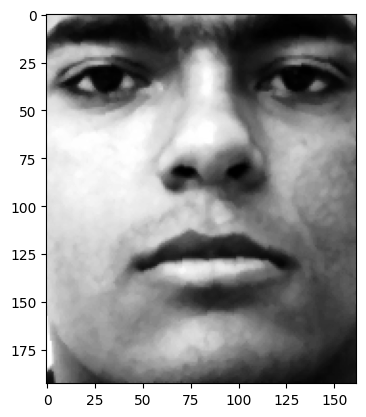

In [11]:
facecol = flat_neu[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

In [12]:
Zface = flat_neu - np.tile(avg_face, (100,1)).T
print(Zface.shape)

(31266, 100)


In [14]:
covFace = np.matmul(Zface.T, Zface)
print(covFace.shape)

(100, 100)


In [15]:
neu_eig, neu_eigv = np.linalg.eig(covFace)

In [16]:
idxNeu = neu_eig.argsort()[::-1]

neuFace = neu_eigv[:,idxNeu]

In [17]:
neuFace.shape

(100, 100)

In [18]:
final_neu = np.matmul(Zface, neuFace)
print(final_neu.shape)

(31266, 100)


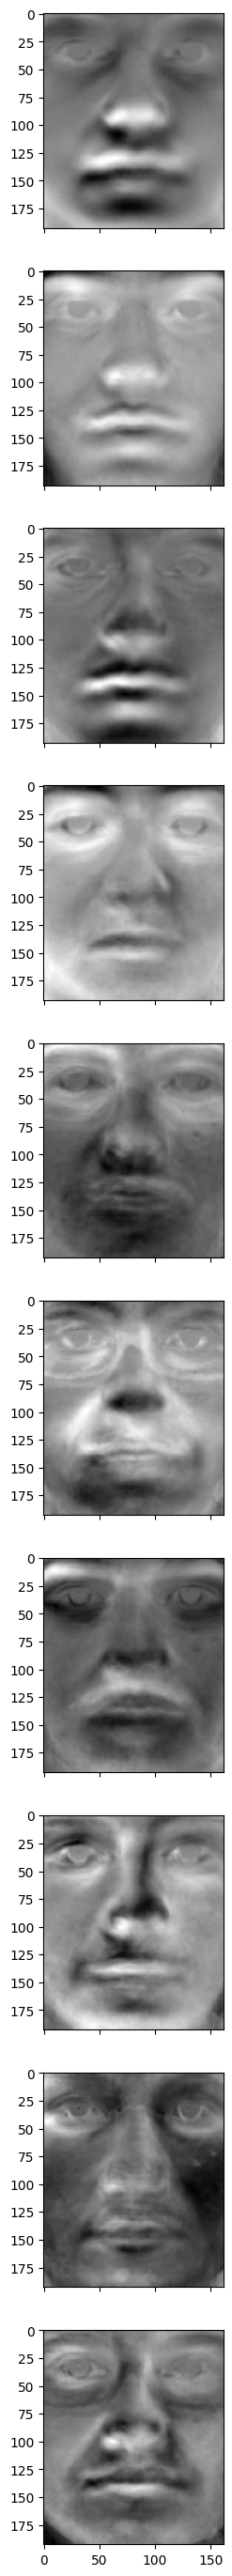

In [19]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(final_neu[:,i].reshape(193,162), cmap="gray")
plt.show()

In [24]:
v,s,vt = np.linalg.svd(covFace)
print(v.shape)
print(s.shape)
print(vt.shape)

(100, 100)
(100,)
(100, 100)


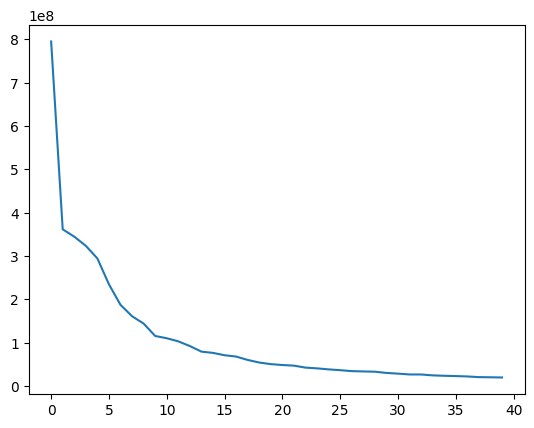

In [28]:
plt.plot(range(40), s[:40])
plt.show()

### I pick k = 15 since the elbow is around there since it is transition from signal to noise

## 1b Smiling!

In [29]:
rand_smikeys = [i.replace("a.jpg", "b.jpg") for i in rand_neukeys]
rand_smi = {k: v for k, v in smi_faces.items() if k in rand_smikeys}

(31266, 100)


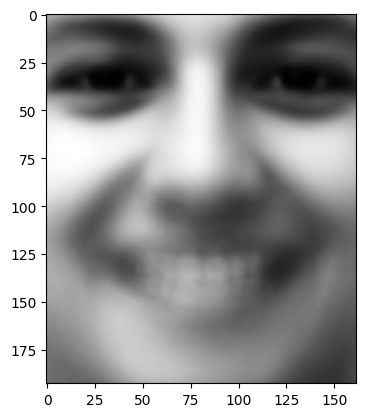

In [30]:
smi_avg_list = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
smi_avg_list = np.vstack(smi_avg_list)
print(smi_avg_list.shape)
faceSmiArr = []
for i in range(31266):
    faceSmiArr.append(np.mean(smi_avg_list[i]))

avg_smiface = np.array(faceSmiArr)
avSmFace = avg_smiface.reshape(193,162)
plt.imshow(avSmFace, cmap="gray")
plt.show()

In [31]:
#flatten the smile faces and subtract by the avg
flat_smi = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
flat_smi = np.vstack(flat_smi)
print(flat_smi.shape)

(31266, 100)


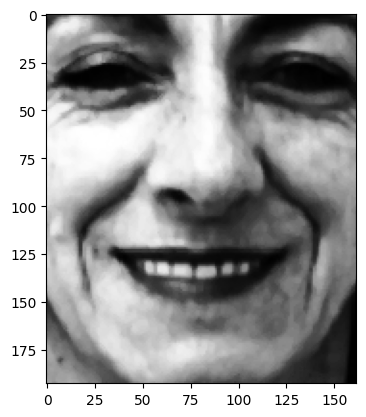

In [32]:
facecol = flat_smi[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

In [33]:
Smface = flat_smi - np.tile(avg_smiface, (100,1)).T
print(Smface.shape)

(31266, 100)


In [34]:
covSmiFace = np.matmul(Smface.T, Smface)
print(covSmiFace.shape)

(100, 100)


In [35]:
eigSmV, eigSmVec = np.linalg.eig(covSmiFace)

In [36]:
idxSmi = eigSmV.argsort()[::-1]

smiFace = eigSmVec[:,idxSmi]

In [37]:
final_smi = np.matmul(Smface, smiFace)
print(final_smi.shape)

(31266, 100)


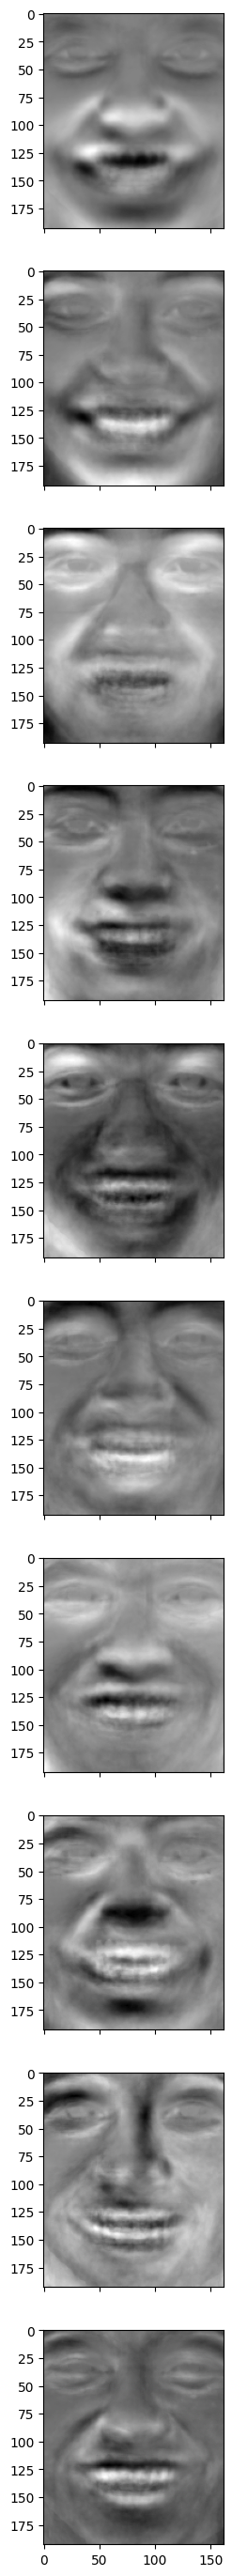

In [38]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(final_smi[:,i].reshape(193,162), cmap="gray")
plt.show()

In [39]:
smi_data = np.array(covSmiFace).reshape(100,-1)
u1, s1, vh1 = np.linalg.svd(smi_data, full_matrices=False)

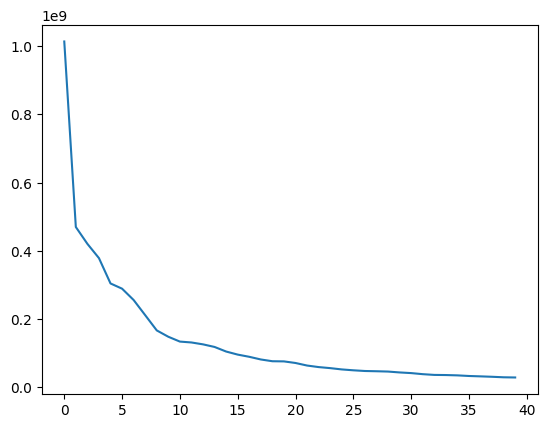

In [41]:
plt.plot(range(40), s1[:40])
plt.show()

### I pick k = 10 since the elbow is around there since it is transition from signal to noise

# Question 2

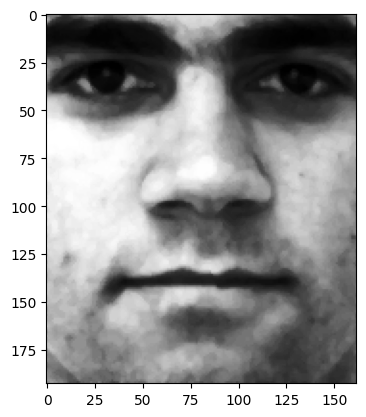

In [82]:
#image I want to reconstruct
recon_neuimg = np.array(flat_neu[:,5])
facecol = recon_neuimg.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

ValueError: operands could not be broadcast together with shapes (31266,) (31266,100) 

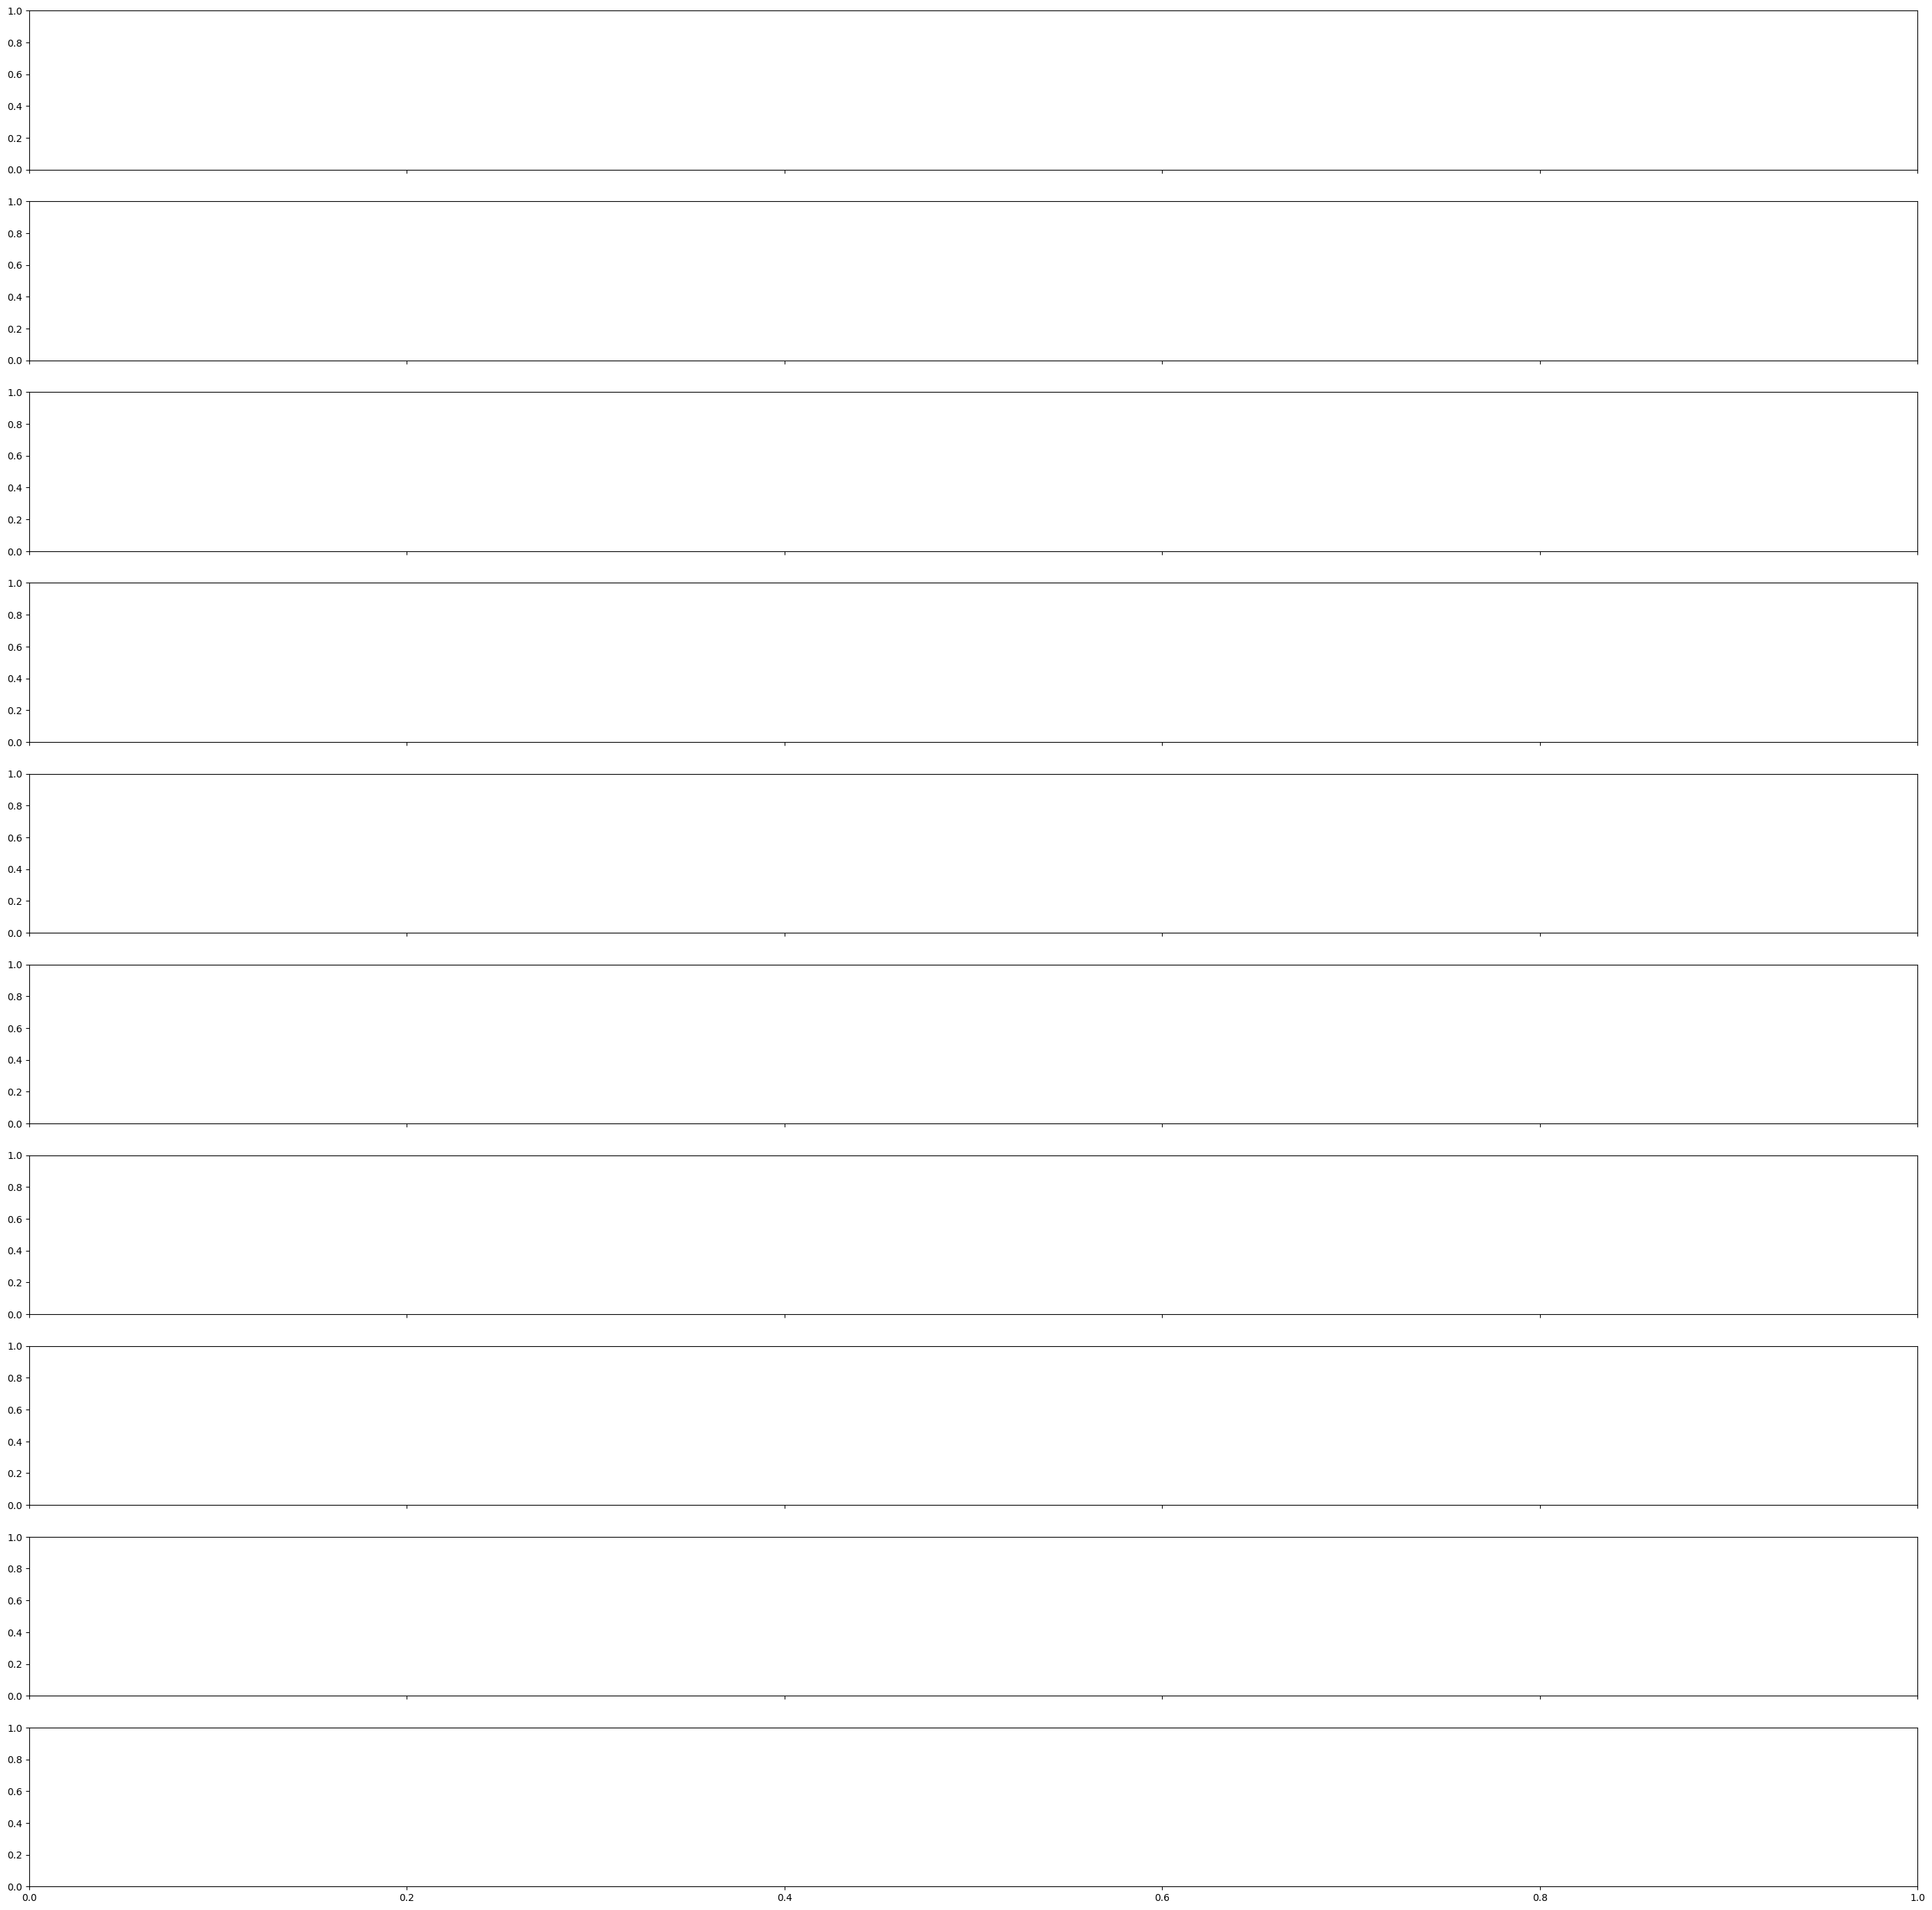

In [88]:
neu_PCA_list = [1,2,3,4,5,10,20,30,50,100]
fig, axes = plt.subplots(len(neu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
neu_recon = []
neu_err = []
tile_im = np.tile(faceArr, (100,1)).T
for k in neu_PCA_list:
    recon_img = np.matmul(final_neu[:,:k].T, recon_neuimg)
    recon_img = np.matmul(final_neu[:,:k], recon_img) + np.tile(faceArr, (100,1)).T

    #recon_img = recon_img + tile_im[:, np.newaxis]
    #print(recon_img.shape)# + np.tile(faceArr, (100,1)).T
    neu_err.append(np.square(np.subtract(recon_img.flatten(),recon_neuimg.flatten())).mean())
    neu_recon.append(recon_img)

for i in range(len(neu_PCA_list)):
    axes[i].imshow(neu_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("MSE = " + str(neu_err[i]))
plt.show()

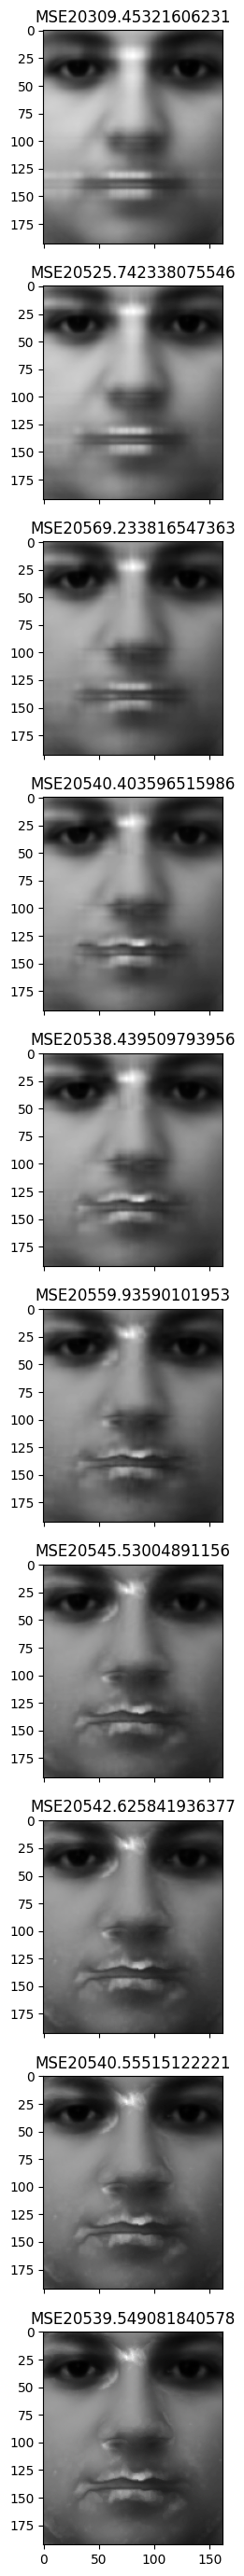

In [67]:
neu_PCA_list = [1,2,3,4,5,10,20,30,50,100]

fig, axes = plt.subplots(len(neu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
neu_recon = []
neu_err = []
for k in neu_PCA_list:
    recon_img = avg_face.reshape(193,162) + v[:,:k] @ np.diag(ts[:k]) @ tvh[:k,:]
    neu_err.append(np.square(np.subtract(recon_img.flatten(),recon_neuimg.flatten())).mean())
    neu_recon.append(recon_img)

for i in range(len(neu_PCA_list)):
    axes[i].imshow(neu_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("MSE: " + str(neu_err[i]))
plt.show()

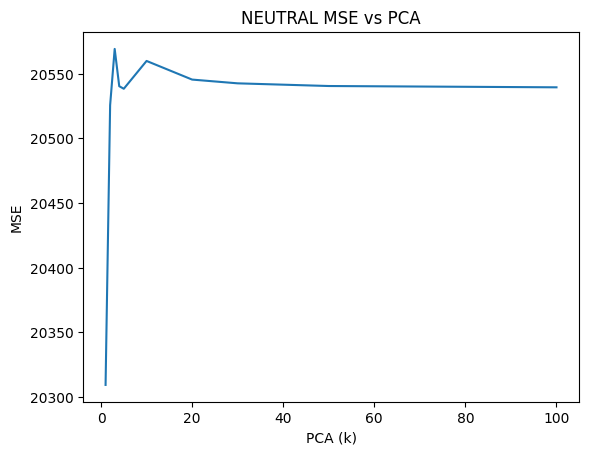

In [75]:
plt.plot(neu_PCA_list, neu_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("NEUTRAL MSE vs PCA")
plt.show()

# Question 3
## SMILE IMAGE I WANT TO RECONSTRUCT

In [69]:
#smile image I want to reconstruct
recon_smiimg = smi_data[5].reshape(193,162)
print(recon_smiimg.shape)

(193, 162)


In [70]:
su, ss, svh = np.linalg.svd(recon_smiimg, full_matrices=False)
print(su.shape)
print(ss.shape)
print(svh.shape)

(193, 162)
(162,)
(162, 162)


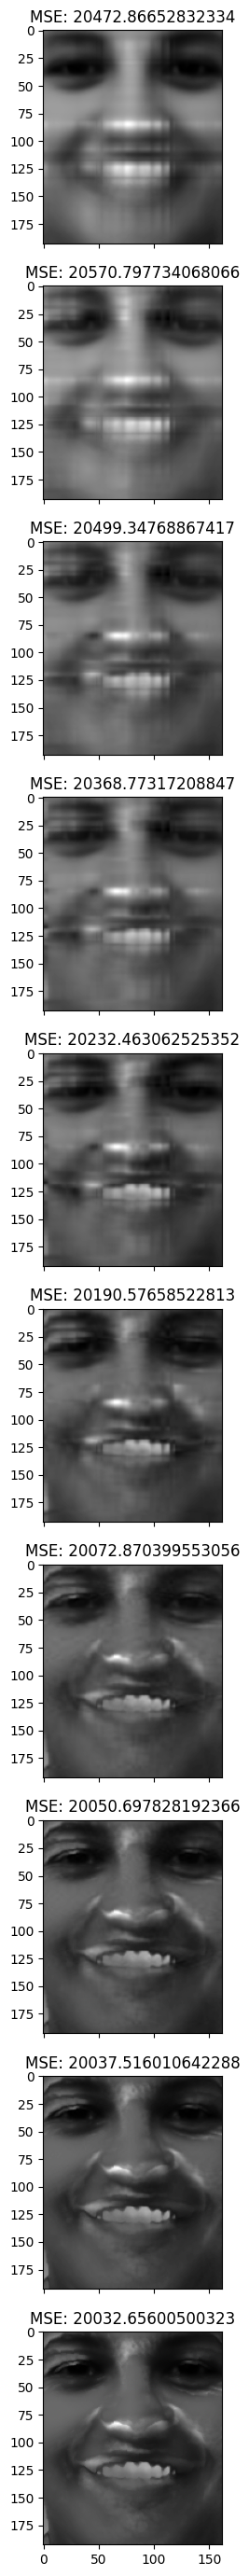

In [71]:
smi_PCA_list = [1,2,3,4,5,10,20,30,50,100]

fig, axes = plt.subplots(len(smi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
smi_recon = []
smi_err = []
for k in smi_PCA_list:
    recon_img = smi_avg_face.reshape(193,162) + su[:,:k] @ np.diag(ss[:k]) @ svh[:k,:]
    smi_err.append(np.square(np.subtract(recon_img.flatten(),recon_smiimg.flatten())).mean())
    smi_recon.append(recon_img)

for i in range(len(smi_PCA_list)):
    axes[i].imshow(smi_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("MSE: " + str(smi_err[i]))
plt.show()

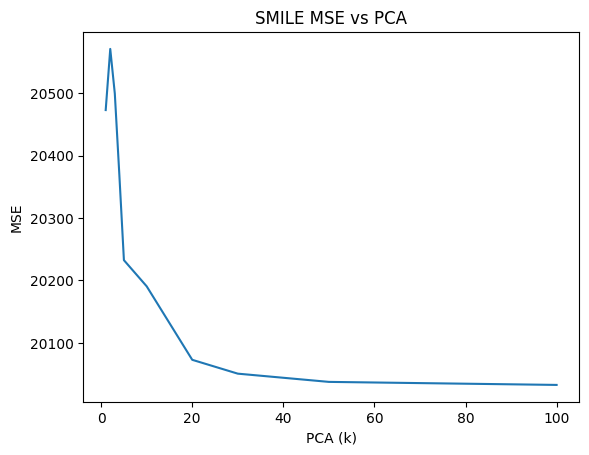

In [74]:
plt.plot(smi_PCA_list, smi_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("SMILE MSE vs PCA")
plt.show()

# QUESTION 4
## Select Random Face Neutral that isnt in training

In [76]:
not_neu_face = []
for i in neu_faces:
    if i not in rand_neukeys:
        not_neu_face = neu_faces[i]
        break

In [80]:
not_neu_face = np.array(not_neu_face).reshape(193,162)
nu, ns, nvh = np.linalg.svd(not_neu_face, full_matrices=False)
print(nu.shape)
print(ns.shape)
print(nvh.shape)

(193, 162)
(162,)
(162, 162)


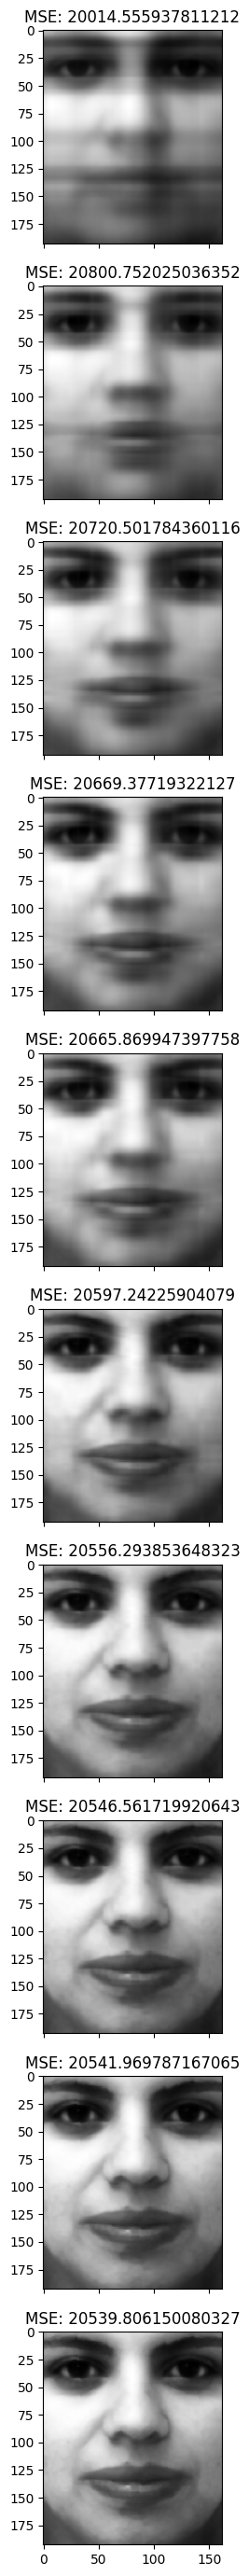

In [81]:
nonneu_PCA_list = [1,2,3,4,5,10,20,30,50,100]

fig, axes = plt.subplots(len(nonneu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nonn_recon = []
nonn_err = []
for k in nonneu_PCA_list:
    recon_img = avg_face.reshape(193,162) + nu[:,:k] @ np.diag(ns[:k]) @ nvh[:k,:]
    nonn_err.append(np.square(np.subtract(recon_img.flatten(),not_neu_face.flatten())).mean())
    nonn_recon.append(recon_img)

for i in range(len(nonneu_PCA_list)):
    axes[i].imshow(nonn_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("MSE: " + str(nonn_err[i]))
plt.show()

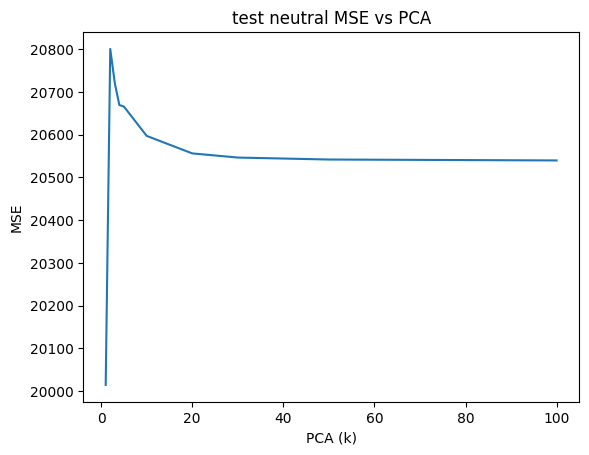

In [83]:
plt.plot(nonneu_PCA_list, nonn_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("test neutral MSE vs PCA")
plt.show()

In [ ]:
not_neu_face = []
for i in neu_faces:
    if i not in rand_neukeys:
        not_neu_face = neu_faces[i]
        break